In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.venues import Venue

There are many existing reports available (all are shown off in the [examples](../tree/master/examples) folder).  However, as a general rule, the reports in the examples folders are run against all the games in SCL5.  It's possible to provide a more narrow filter as well.

`get_parsed_replays` is the method that returns `Game` objects.  All parsed games that have added to the repository are available to this search.  See [[Available Parsed Replays]] for more information.

The argument to `get_parsed_replays` is a function.  This function takes one argument, an instance of [`Game`](../tree/master/triple_agent/utilities/game.py), and returns `True` or `False`.  Each game instance that the filter function returns `True` is included in the final list, and instances that return `False` are excluded.

For example, the included `select_scl5_regular_season` function looks like this:

```python
def select_scl5_regular_season(game):
    return (
        game.event == "SCL5"
        and game.spy not in SCL5_DROPPED_PLAYERS
        and game.sniper not in SCL5_DROPPED_PLAYERS
    )
```

If I wanted to instead return only games on Veranda that lasted fewer than 1 minute, I could use this filter function instead.

`short_veranda_games` can now be used in any of the pre-defined reports to analyze game data!

In [4]:
def select_short_veranda(game):
    return game.venue == Venue.Veranda and game.duration < 120

In [5]:
short_veranda_games = get_parsed_replays(select_short_veranda)

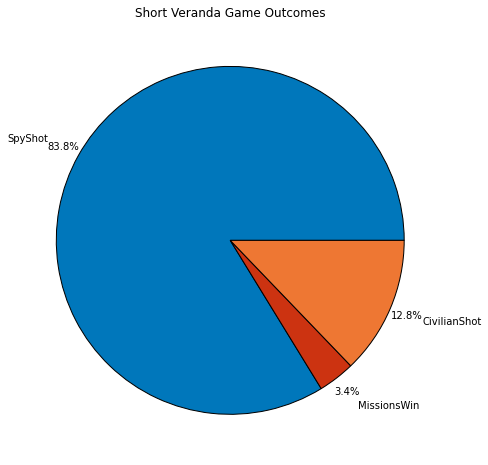

In [6]:
_=game_outcomes(
    short_veranda_games,
    axis_properties=AxisProperties(title="Short Veranda Game Outcomes"))

In [7]:
def select_long_veranda(game):
    return game.venue == Venue.Veranda and game.duration >= 120

In [8]:
long_veranda_games = get_parsed_replays(select_long_veranda)

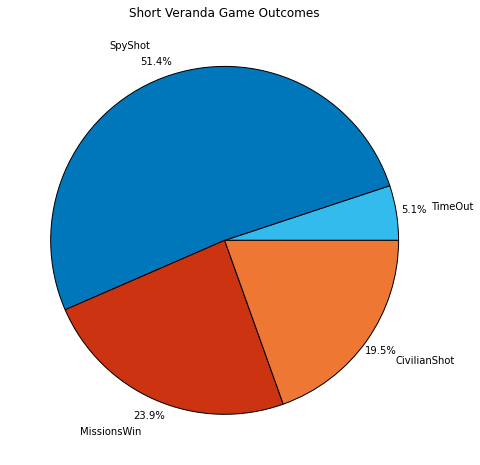

In [9]:
_=game_outcomes(
    long_veranda_games,
    axis_properties=AxisProperties(title="Short Veranda Game Outcomes"))